Classifier
- import data and libraries
- EDA
- convert data to numpy array and matrix
- build model
- build cost function
- build gradient function
- build gradient descent algorithm
- test and graph results
- (potentially) build regularisation additions
- build scikit learn
- compare and graph scikit learn to model

### Pre-Work

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math, copy

In [2]:
df = pd.read_csv("../data/breast-cancer.csv")
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
df = df.drop(['id', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], axis=1)

In [9]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')

### Classification

In [59]:
x_values = df.drop('diagnosis', axis=1).to_numpy()
y_values = df['diagnosis'].to_numpy()

x_values.shape
training_num_x = 455
testing_num_x = x_values.shape[0] - training_num_x
print(f"Training: {training_num_x}, {training_num_x/(x_values.shape[0])*100:.2f}%\nTesting: {testing_num_x}, {testing_num_x/(x_values.shape[0])*100:.2f}%, ")

X_train = x_values[:455]
X_test = x_values[455:]

y_values_train = y_values[:455]
y_values_test = y_values[455:]

y_train = np.array([1 if char == "M" else 0 for char in y_values_train])
y_test = np.array([1 if char == "M" else 0 for char in y_values_test])

Training: 455, 79.96%
Testing: 114, 20.04%, 


In [25]:
# model
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return (1 / (1 + np.exp(-z)))

In [28]:
# cost function
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0
    
    for i in range(m):
        z = np.dot(X[i], w) + b
        f_wb = sigmoid(z)

        eps = 1e-15
        f_wb = sigmoid(z)
        f_wb = np.clip(f_wb, eps, 1 - eps)
        
        loss = -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
        cost += loss

    total_cost = cost / m
    return total_cost

In [17]:
# gradient function
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        z = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z)
        err = f_wb_i - y[i]

        for j in range(n):
            dj_dw[j] += err * X[i, j]
        dj_db += err

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [79]:
# gradient descent
def gradient_descent(X, y, w_in, b_in, num_iters, alpha, cost_function, gradient_function):
    m, n = X.shape
    w = w_in
    b = b_in

    J_history = []
    w_history = []

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w, b)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w.copy())
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history

In [80]:
def normalise_features(X):
    mu =  np.mean(X, axis=0) # a row where each column holds the average value of that feature
    sigma = np.std(X, axis=0) # average distance of every feature from its mean (row of std for each feature)
    X_norm = ( X - mu ) / sigma # applying transformation to matrix
    return X_norm, mu, sigma

X_norm, mu, sigma = normalise_features(X_train)

final_w, final_b, J_history = gradient_descent(X_norm, 
                 y_train, 
                 w_in=np.zeros(X_norm.shape[1]), 
                 b_in=0, 
                 num_iters=5000, 
                 alpha=0.1, 
                 cost_function=compute_cost, 
                 gradient_function=compute_gradient)

Iteration    0: Cost     0.59   
Iteration  500: Cost     0.11   
Iteration 1000: Cost     0.11   
Iteration 1500: Cost     0.10   
Iteration 2000: Cost     0.10   
Iteration 2500: Cost     0.10   
Iteration 3000: Cost     0.10   
Iteration 3500: Cost     0.10   
Iteration 4000: Cost     0.10   
Iteration 4500: Cost     0.10   
Iteration 4999: Cost     0.09   


In [63]:
X_test_norm, mu, sigma = normalise_features(X_test)

p = sigmoid(X_test_norm @ final_w + final_b)      # shape: (m,)
y_pred = (p >= 0.5).astype(int)       # shape: (m,)
accuracy = (y_pred == y_test).mean()
print("My Accuracy:", accuracy)

Accuracy: 0.8859649122807017


In [81]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_norm, y_train)

y_pred = lr_model.predict(X_test_norm)
print(f"Scikit-Learn Accuracy: {lr_model.score(X_test_norm, y_test)}")

Scikit-Learn Accuracy: 0.9035087719298246


In [67]:
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, log_loss, confusion_matrix
)

def metrics_from_proba(y_true, p, threshold=0.5):
    eps = 1e-15
    p = np.clip(p, eps, 1 - eps)
    y_pred = (p >= threshold).astype(int)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1": f1_score(y_true, y_pred, zero_division=0),
        "roc_auc": roc_auc_score(y_true, p),
        "log_loss": log_loss(y_true, p),
        "tn": int(tn), "fp": int(fp), "fn": int(fn), "tp": int(tp),
        "specificity": tn / (tn + fp) if (tn + fp) else 0.0,
        "npv": tn / (tn + fn) if (tn + fn) else 0.0,
        "fpr": fp / (fp + tn) if (fp + tn) else 0.0,
        "fnr": fn / (fn + tp) if (fn + tp) else 0.0,
    }

def print_metrics(title, m):
    print(f"\n=== {title} ===")
    print(f"Accuracy     : {m['accuracy']:.4f}")
    print(f"Precision    : {m['precision']:.4f}")
    print(f"Recall (TPR) : {m['recall']:.4f}")
    print(f"F1           : {m['f1']:.4f}")
    print(f"ROC AUC      : {m['roc_auc']:.4f}")
    print(f"Log Loss     : {m['log_loss']:.4f}")
    print(f"Specificity  : {m['specificity']:.4f}")
    print(f"NPV          : {m['npv']:.4f}")
    print(f"FPR          : {m['fpr']:.4f}")
    print(f"FNR          : {m['fnr']:.4f}")
    print("Confusion matrix [[TN FP],[FN TP]]:")
    print([[m["tn"], m["fp"]], [m["fn"], m["tp"]]])

# ----------------------------
# Your model probabilities
# ----------------------------
p_mine = sigmoid(X_test_norm @ w + b)

# ----------------------------
# Sklearn model probabilities
# (works if lr_model is LogisticRegression or a Pipeline)
# ----------------------------
p_sk = lr_model.predict_proba(X_test_norm)[:, 1]

# Compute metrics
mine = metrics_from_proba(y_test, p_mine, threshold=0.5)
sk   = metrics_from_proba(y_test, p_sk,   threshold=0.5)

# Print
print_metrics("YOUR MODEL", mine)
print_metrics("SKLEARN MODEL", sk)

# Optional: show deltas (mine - sklearn)
print("\n=== DIFFERENCE (mine - sklearn) ===")
for k in ["accuracy","precision","recall","f1","roc_auc","log_loss","specificity","npv","fpr","fnr"]:
    print(f"{k:12s}: {mine[k] - sk[k]:+.6f}")



=== YOUR MODEL ===
Accuracy     : 0.8860
Precision    : 0.6667
Recall (TPR) : 1.0000
F1           : 0.8000
ROC AUC      : 0.9965
Log Loss     : 0.2084
Specificity  : 0.8523
NPV          : 1.0000
FPR          : 0.1477
FNR          : 0.0000
Confusion matrix [[TN FP],[FN TP]]:
[[75, 13], [0, 26]]

=== SKLEARN MODEL ===
Accuracy     : 0.9035
Precision    : 0.7027
Recall (TPR) : 1.0000
F1           : 0.8254
ROC AUC      : 0.9956
Log Loss     : 0.2032
Specificity  : 0.8750
NPV          : 1.0000
FPR          : 0.1250
FNR          : 0.0000
Confusion matrix [[TN FP],[FN TP]]:
[[77, 11], [0, 26]]

=== DIFFERENCE (mine - sklearn) ===
accuracy    : -0.017544
precision   : -0.036036
recall      : +0.000000
f1          : -0.025397
roc_auc     : +0.000874
log_loss    : +0.005216
specificity : -0.022727
npv         : +0.000000
fpr         : +0.022727
fnr         : +0.000000


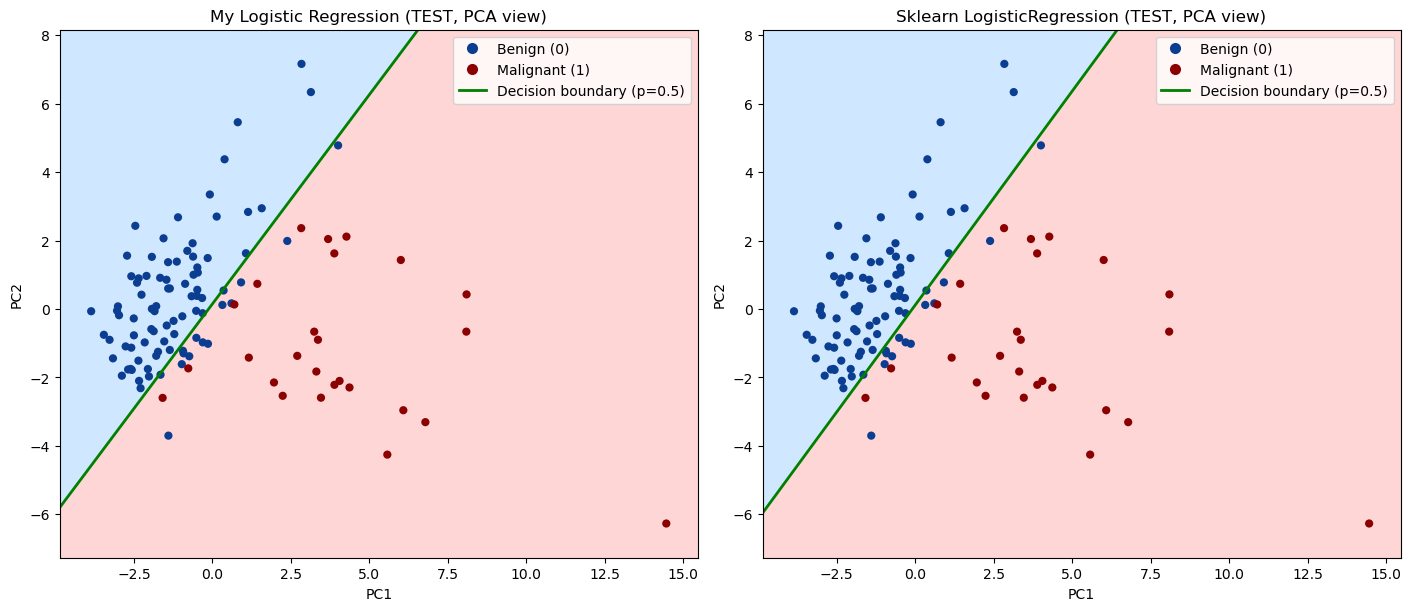

In [77]:
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA

# ----- 1) Fit PCA on TRAIN, transform TEST -----
pca = PCA(n_components=2, random_state=42)
pca.fit(X_train_norm)
X2_test = pca.transform(X_test_norm)

# ----- 2) Grid in PCA space (based on TEST extents) -----
pad = 1.0
x_min, x_max = X2_test[:, 0].min() - pad, X2_test[:, 0].max() + pad
y_min, y_max = X2_test[:, 1].min() - pad, X2_test[:, 1].max() + pad

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)
grid_2d = np.c_[xx.ravel(), yy.ravel()]

# Map grid back to original NORMALISED feature space
X_grid_norm = pca.inverse_transform(grid_2d)

# ----- 3) Probabilities on the grid for BOTH models -----
p_mine = sigmoid(X_grid_norm @ w + b).reshape(xx.shape)
p_sk   = lr_model.predict_proba(X_grid_norm)[:, 1].reshape(xx.shape)

# ----- 4) Color choices (as you requested) -----
benign_dot   = "#0b3d91"   # dark blue
malignant_dot= "#8b0000"   # dark red
benign_bg    = "#cfe8ff"   # pastel blue
malignant_bg = "#ffd6d6"   # pastel red

# Legend handles
handles = [
    Line2D([0], [0], marker='o', linestyle='None', markersize=8,
           markerfacecolor=benign_dot, markeredgecolor='none', label='Benign (0)'),
    Line2D([0], [0], marker='o', linestyle='None', markersize=8,
           markerfacecolor=malignant_dot, markeredgecolor='none', label='Malignant (1)'),
    Line2D([0], [0], color="green", linewidth=2, label="Decision boundary (p=0.5)")
]

# ----- 5) Plot side-by-side (TEST points) -----
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

for ax, probs, title in [
    (axes[0], p_mine, "My Logistic Regression (TEST, PCA view)"),
    (axes[1], p_sk,   "Sklearn LogisticRegression (TEST, PCA view)")
]:
    # Two-tone background by class region
    ax.contourf(xx, yy, probs, levels=[0.0, 0.5, 1.0],
                colors=[benign_bg, malignant_bg], alpha=1.0)

    # Green decision boundary
    ax.contour(xx, yy, probs, levels=[0.5], colors=["green"], linewidths=2)

    # Plot test points with fixed colors
    benign_mask = (y_test == 0)
    mal_mask    = (y_test == 1)

    ax.scatter(X2_test[benign_mask, 0], X2_test[benign_mask, 1],
               c=benign_dot, s=35, edgecolors="none")
    ax.scatter(X2_test[mal_mask, 0], X2_test[mal_mask, 1],
               c=malignant_dot, s=35, edgecolors="none")

    ax.set_title(title)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.legend(handles=handles, loc="best")

plt.show()


In [83]:
import pickle

w = np.zeros(X_norm.shape[1])
b = 0
iterations = 5000
alpha_in = 0.1

X_norm, mu, sigma = normalise_features(X_train)
final_w, final_b, J_history = gradient_descent(X_norm, 
                 y_train, 
                 w_in=w, 
                 b_in=b, 
                 num_iters=iterations, 
                 alpha=alpha_in, 
                 cost_function=compute_cost, 
                 gradient_function=compute_gradient)

model_data = {
    "w": final_w,
    "b": final_b,
    "mu": mu,
    "sigma": sigma,
}

with open('breast-cancer-model.pkl', 'wb') as file:
    pickle.dump(model_data, file)

Iteration    0: Cost     0.59   
Iteration  500: Cost     0.11   
Iteration 1000: Cost     0.11   
Iteration 1500: Cost     0.10   
Iteration 2000: Cost     0.10   
Iteration 2500: Cost     0.10   
Iteration 3000: Cost     0.10   
Iteration 3500: Cost     0.10   
Iteration 4000: Cost     0.10   
Iteration 4500: Cost     0.10   
Iteration 4999: Cost     0.09   
